
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [2]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


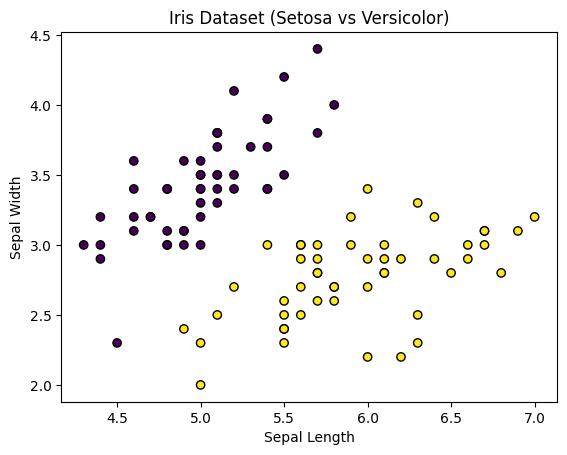

In [3]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2) Fit KNN (k = 3)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# 3) Predict
y_pred = knn3.predict(X_test)

# 4) Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy for the value of (k=3) is :", acc)


Accuracy for the value of (k=3) is : 1.0



## Task 4: Predictions for Different Values of k


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Try different k values (use odd values to reduce ties)
k_values = [1, 3, 5, 7, 9, 11]

results = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, p=2)  # p=2 => Euclidean distance
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({"k": k, "accuracy": acc})

    print(f"k = {k:>2} | accuracy = {acc:.4f} | sample preds = {y_pred[:10]}")

pd.DataFrame(results)


k =  1 | accuracy = 1.0000 | sample preds = [1 1 1 1 0 0 0 1 0 0]
k =  3 | accuracy = 1.0000 | sample preds = [1 1 1 1 0 0 0 1 0 0]
k =  5 | accuracy = 1.0000 | sample preds = [1 1 1 1 0 0 0 1 0 0]
k =  7 | accuracy = 1.0000 | sample preds = [1 1 1 1 0 0 0 1 0 0]
k =  9 | accuracy = 1.0000 | sample preds = [1 1 1 1 0 0 0 1 0 0]
k = 11 | accuracy = 1.0000 | sample preds = [1 1 1 1 0 0 0 1 0 0]


,k,accuracy
0,1,1.0
1,3,1.0
2,5,1.0
3,7,1.0
4,9,1.0
5,11,1.0



## Task 5: Decision Boundary Function (Provided)


In [14]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


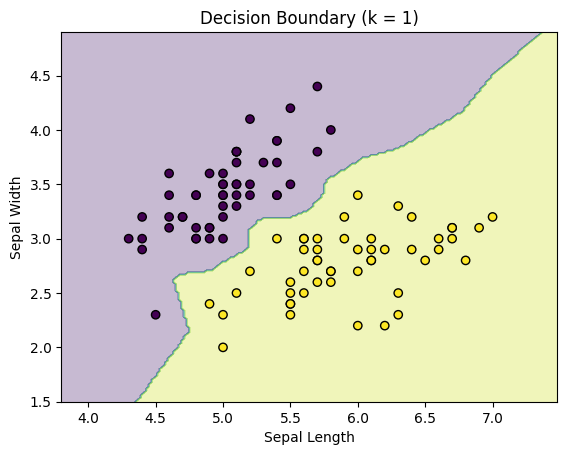

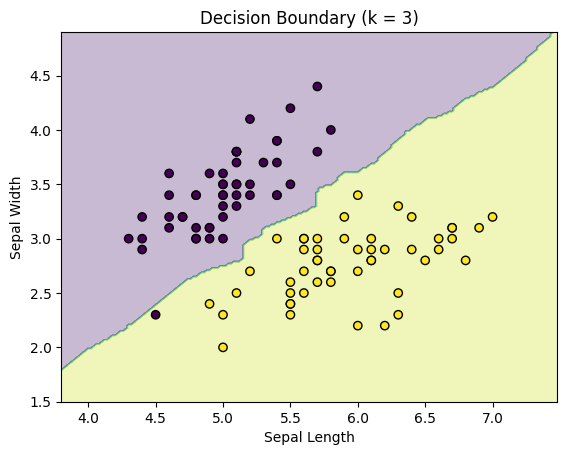

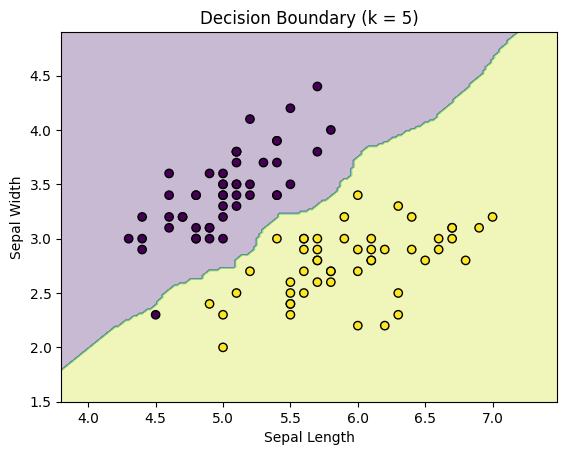

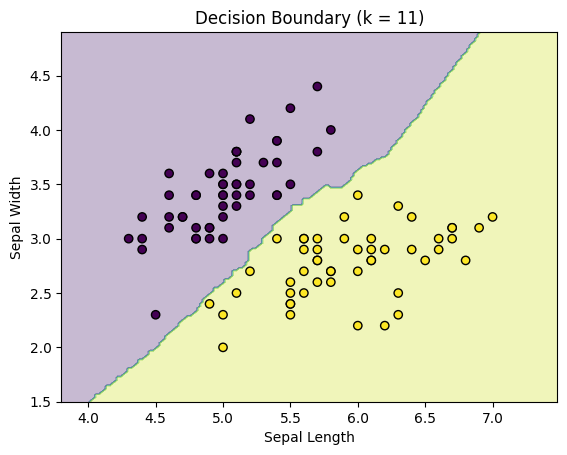

In [12]:

for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [ ]:
Plot a decision boundary when using k=5 and change the distance

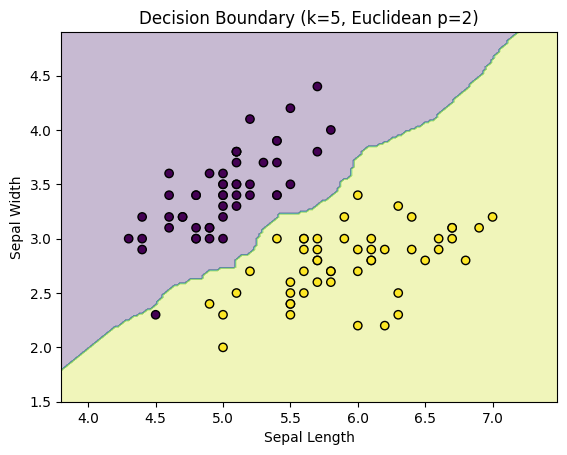

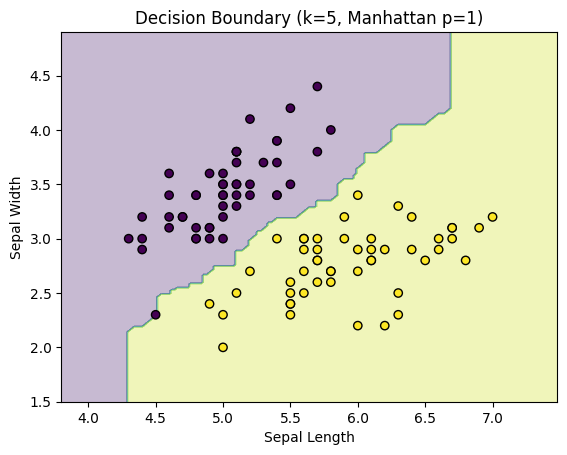

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

# Euclidean distance (p=2)
model_eu = KNeighborsClassifier(n_neighbors=k, p=2)
model_eu.fit(X, y)
plot_decision_boundary(model_eu, X, y, title="Decision Boundary (k=5, Euclidean p=2)")

# Manhattan distance (p=1)
model_man = KNeighborsClassifier(n_neighbors=k, p=1)
model_man.fit(X, y)
plot_decision_boundary(model_man, X, y, title="Decision Boundary (k=5, Manhattan p=1)")



## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


### Task 8: Observations

#### 1) How do predictions change as *k* increases?
As *k* increases, the classifier becomes less sensitive to individual training points.  
That usually makes predictions more stable, but it can also blur class boundaries if *k* is too large.

#### 2) Which *k* value gives the most complex decision boundary?
The smallest *k* (especially *k = 1*) gives the most complex, jagged boundary.  
It creates many tiny regions because each point heavily influences the space around it.

#### 3) Why does *k = 1* behave differently?
With *k = 1*, every training point is essentially its own “rule,” so the model tends to overfit.  
It can perfectly match the training data (or nearly so), but generalization on unseen points may be worse.

#### 4) How does the distance metric affect results?
Changing the distance metric changes which neighbors are considered “closest.”  
Euclidean distance (p=2) and Manhattan distance (p=1) can shift the boundary, especially near overlapping areas.

#### 5) Which configuration would you choose and why?
A mid-range *k* (like 5 or 11) is usually a good balance: the boundary is not too noisy, and accuracy is often strong.  
Final choice should be based on test accuracy from Task 4 and whether the boundary looks reasonable (not overly jagged or overly smooth).
